# Data Scientist Survey Data Analysis
Author: Rona Emmanuel Katuma

## Introduction
The project aims to understand further the trends and insights from multiple years of developer survey data. The analysis adheres to CRISP-DM (Cross-Industry Standard Process for Data Mining) framework, that offers  systematic approach to derive insights that answers data-driven questions. This analysis will focus on exploring 2017-2023(6) years of survey data to address guiding business questions related to breaking into the field, data science programming language preferences, remote work trends.

## CRISP-DM Steps - Udacity Write a Data Science Blog Post

### 1. Business Understanding
In this step, we define the business questions we want to answer using the developer survey data. The key areas of interest include:
- Question 1: - How do data scientists learn how to code over years?
- Question 2: - What are the most popular languages among data scientists over the years and are they different from developers?
- Question 3: - What is the trend in remote work among data scientists and developers over the years?


### Dependencies

In [122]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')

from IPython import display
pd.set_option('display.max_columns', None)

import warnings

# Ignore the DtypeWarning
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)

get_ipython().run_line_magic('matplotlib', 'inline')
print("imported")

imported


### 2. Data Understanding

Multiple years of the stack overflow survey data was gathered, loaded and explored to familiarize with its contents and structure.This is a rich dataset entailing numerous columns including Profession, language preferences, remote working, employment status learning methods and education level.

In [123]:
# Load data for different years
df_2017 = pd.read_csv("./Data/Stack-overflow-developer-survey-2017.csv")
df_2018 = pd.read_csv("./Data/Stack-overflow-developer-survey-2018.csv")
df_2019 = pd.read_csv("./Data/Stack-overflow-developer-survey-2019.csv")
df_2020 = pd.read_csv("./Data/Stack-overflow-developer-survey-2020.csv")
df_2021 = pd.read_csv("./Data/Stack-overflow-developer-survey-2021.csv")
df_2022 = pd.read_csv("./Data/Stack-overflow-developer-survey-2022.csv")
df_2023 = pd.read_csv("./Data/Stack-overflow-developer-survey-2023.csv")
print("Data loaded")

Data loaded


In [124]:
# Add the year of the survey as a new column in each dataframe
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020
df_2021['Year'] = 2021
df_2022['Year'] = 2022
df_2023['Year'] = 2023

# Check the result
df_2023.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,Year
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0,2023
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Deve

In [125]:
# List of DataFrames
annualdata = [df_2017, df_2019, df_2020, df_2021, df_2022, df_2023]

# Function to list columns for each annualdata
def list_columns(annualdata):
    for i, df in enumerate(annualdata, 1):
        print(f"Columns for annualdata {i}:")
        print(df.columns.tolist())
        print("\n")

# Call the function with your list of annualdata
list_columns(annualdata)

Columns for annualdata 1:
['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 

In [126]:
#Checking for columns with similar content in different years
selected_columns = ['CousinEducation','EducationTypes'] 
df_selected = df_2017[selected_columns]
print(df_selected.head())

  CousinEducation                                     EducationTypes
0             NaN           Online course; Open source contributions
1             NaN  Online course; Self-taught; Hackathon; Open so...
2             NaN  Self-taught; Coding competition; Hackathon; Op...
3             NaN                                                NaN
4             NaN                                                NaN


In [127]:
#Checking for columns with similar content in different years
selected_columns = ['LearnCode','EdLevel','LearnCodeOnline','LearnCodeCoursesCert'] 
df_selected = df_2023[selected_columns]
print(df_selected.head())

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family member;Other online...   
4  Books / Physical media;Online Courses or Certi...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                     LearnCodeOnline  LearnCodeCoursesCert  
0                                                NaN                   NaN  
1  Formal documentation provided by the owner of ...                 Other  
2  Formal documentation provided by the owner of ...                   NaN  
3  Formal documentation provided by the owner of

### 3. Data Preparation

This step aims at preparing the data for the analysis; the below steps were undertaken:
- Upon Loading the data from CSV specific columns of interest were selected.
- Created a mapping of column names to unify them across all years.
- Checked the data information to identify data types and convert columns of interest to suitable data types to ease analysis
- Checked for duplicates.
- Checked for missing values.
- Filled missing values using mode imputation.
- Split columns containing multiple values into lists(language, learncode, learncodeonline).
- Convert the string representation of lists to actual lists.

In [128]:
# Mapping for standard column names
column_mapping = {
    '2017': {'CousinEducation': 'LearnCode','HaveWorkedLanguage': 'LanguageWorkedWith',
             'DeveloperType': 'DevType','FormalEducation': 'EdLevel','YearsCodedJob': 'YearsCoding',
             'EmploymentStatus': 'Employment','Salary': 'ConvertedComp','WorkRemote': 'RemoteWork','WantWorkLanguage':'LanguageDesireNextYear'},
    '2018': {'FormalEducation': 'EdLevel'},
    '2019': {'WorkRemote': 'RemoteWork'},
    '2020': {'WorkRemote': 'RemoteWork'},
    '2021': { 'ResponseId': 'Respondent','LanguageHaveWorkedWith': 'LanguageWorkedWith',
             'LanguageWantToWorkWith': 'LanguageDesireNextYear','ConvertedCompYearly': 'ConvertedComp'},
    '2022': { 'ResponseId': 'Respondent','LanguageHaveWorkedWith': 'LanguageWorkedWith',
             'LanguageWantToWorkWith': 'LanguageDesireNextYear','ConvertedCompYearly': 'ConvertedComp'},
    '2023': {'WorkRemote': 'RemoteWork', 'ResponseId': 'Respondent','LanguageHaveWorkedWith': 'LanguageWorkedWith',
             'LanguageWantToWorkWith': 'LanguageDesireNextYear','ConvertedCompYearly': 'ConvertedComp'}}

# Standardize column names
def standardize_columns(df, year):
    if year in column_mapping:
        df.rename(columns=column_mapping[year], inplace=True)

standardize_columns(df_2017, '2017')
standardize_columns(df_2018, '2018')
standardize_columns(df_2019, '2019')
standardize_columns(df_2020, '2020')
standardize_columns(df_2021, '2021')
standardize_columns(df_2022, '2022')
standardize_columns(df_2023, '2023')
# Check the result
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,Employment,EdLevel,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCoding,YearsCodedJobPast,DevType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LearnCode,WorkStart,LanguageWorkedWith,LanguageDesireNextYear,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,ConvertedComp,ExpectedSalary,Year
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once eac

In [129]:
# Columns you want to keep in both DataFrames
columns_to_keep_2017 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedComp', 'Country', 'DevType','LearnCode','CareerSatisfaction','EdLevel','Year',]
columns_to_keep_2018 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedSalary', 'Country','DevType','EdLevel', 'CareerSatisfaction','Year']
columns_to_keep_2019 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedComp', 'Country', 'DevType', 'YearsCode', 'EdLevel', 'CareerSat', 'RemoteWork','Year']
columns_to_keep_2020 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedComp', 'Country', 'DevType', 'YearsCode', 'EdLevel', 'JobSat','Year']
columns_to_keep_2021 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedComp', 'Country', 'DevType', 'YearsCode', 'EdLevel','Year','LearnCode',]
columns_to_keep_2022 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedComp', 'Country', 'DevType', 'YearsCode', 'EdLevel', 'RemoteWork','Year','LearnCode','LearnCodeOnline','LearnCodeCoursesCert']
columns_to_keep_2023 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedComp', 'Country', 'DevType', 'YearsCode', 'EdLevel', 'RemoteWork','Year','LearnCode','LearnCodeOnline','LearnCodeCoursesCert']

# Keep only the specified columns in each DataFrame
df_2017 = df_2017[columns_to_keep_2017]
df_2018 = df_2018[columns_to_keep_2018]
df_2019 = df_2019[columns_to_keep_2019]
df_2020 = df_2020[columns_to_keep_2020]
df_2021 = df_2021[columns_to_keep_2021]
df_2022 = df_2022[columns_to_keep_2022]
df_2023 = df_2023[columns_to_keep_2023]

# Now, df1 and df2 only contain the specified columns
print("DataFrame 1:")
print(df_2017)
print("\nDataFrame 2:")
print(df_2018)
print("DataFrame 3:")
print(df_2019)
print("\nDataFrame 4:")
print(df_2020)

DataFrame 1:
       Respondent                          LanguageWorkedWith  \
0               1                                       Swift   
1               2               JavaScript; Python; Ruby; SQL   
2               3                           Java; PHP; Python   
3               4                      Matlab; Python; R; SQL   
4               5                                         NaN   
...           ...                                         ...   
51387       51388    C#; JavaScript; Python; SQL; VB.NET; VBA   
51388       51389                                   Java; SQL   
51389       51390                                         NaN   
51390       51391                      JavaScript; PHP; Swift   
51391       51392  Java; JavaScript; PHP; Python; Ruby; Swift   

                                  LanguageDesireNextYear  \
0                                                  Swift   
1                                Java; Python; Ruby; SQL   
2                         

In [130]:
df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)
df.head()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,Employment,ConvertedComp,Country,DevType,LearnCode,CareerSatisfaction,EdLevel,Year,ConvertedSalary,YearsCode,CareerSat,RemoteWork,JobSat,LearnCodeOnline,LearnCodeCoursesCert
0,1,Swift,Swift,"Not employed, and not looking for work",NaN,United States,NaN,NaN,NaN,Secondary school,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL,Employed part-time,NaN,United Kingdom,NaN,NaN,NaN,Some college/university study without earning ...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Java; PHP; Python,C; Python; Rust,Employed full-time,113750.0,United Kingdom,Other,NaN,8.0,Bachelor's degree,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Matlab; Python; R; SQL,Matlab; Python; R; SQL,Employed full-time,NaN,United States,NaN,NaN,6.0,Doctoral degree,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,Employed full-time,NaN,Switzerland,Mobile developer; Graphics programming; Deskto...,NaN,6.0,Master's degree,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549482 entries, 0 to 549481
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Respondent              549482 non-null  int64  
 1   LanguageWorkedWith      500378 non-null  object 
 2   LanguageDesireNextYear  469773 non-null  object 
 3   Employment              540678 non-null  object 
 4   ConvertedComp           236404 non-null  float64
 5   Country                 545841 non-null  object 
 6   DevType                 463586 non-null  object 
 7   LearnCode               265774 non-null  object 
 8   CareerSatisfaction      119199 non-null  object 
 9   EdLevel                 532586 non-null  object 
 10  Year                    549482 non-null  int64  
 11  ConvertedSalary         47702 non-null   float64
 12  YearsCode               386029 non-null  object 
 13  CareerSat               72847 non-null   object 
 14  RemoteWork          

In [132]:
# Specifying desired data types for selected columns
updated_data_types = {
    'Country': 'category',
    'Employment': 'category',
    'EdLevel': 'category',
    'DevType': 'object',
    'JobSat': 'category',
    'LearnCode':'category',
    'EdLevel':'category',
    'LearnCodeOnline':'category',
    'LearnCodeCoursesCert':'category',
    'LanguageWorkedWith': 'category',
    'LanguageDesireNextYear': 'category',
    'RemoteWork': 'category'
}

# Update the data types of the specified columns in the DataFrame
for column, data_type in updated_data_types.items():
    df[column] = df[column].astype(data_type)


In [133]:
# Display the data types of all columns in the dataframe
df.dtypes

Respondent                   int64
LanguageWorkedWith        category
LanguageDesireNextYear    category
Employment                category
ConvertedComp              float64
Country                   category
DevType                     object
LearnCode                 category
CareerSatisfaction          object
EdLevel                   category
Year                         int64
ConvertedSalary            float64
YearsCode                   object
CareerSat                   object
RemoteWork                category
JobSat                    category
LearnCodeOnline           category
LearnCodeCoursesCert      category
dtype: object

In [134]:
# Check for duplicates in all columns
duplicates = df[df.duplicated()]

# Display rows with duplicates (if any)
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [135]:
df.isnull().mean() * 100

Respondent                 0.000000
LanguageWorkedWith         8.936416
LanguageDesireNextYear    14.506208
Employment                 1.602236
ConvertedComp             56.976935
Country                    0.662624
DevType                   15.632177
LearnCode                 51.631901
CareerSatisfaction        78.307024
EdLevel                    3.074896
Year                       0.000000
ConvertedSalary           91.318733
YearsCode                 29.746743
CareerSat                 86.742605
RemoteWork                63.046651
JobSat                    91.775163
LearnCodeOnline           78.021300
LearnCodeCoursesCert      87.904062
dtype: float64

In [136]:
#check for unique column values in LearnCodeOnline
df_2023['LearnCodeOnline'].unique()

array([nan,
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow',
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow',
       ...,
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Stack Overflow;Certification videos;Other (Please specify):',
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Written-based Online Cou

In [137]:
#Check for unique column values and display 20 top rows
top_dev_types = df['DevType'].value_counts().head(20)
print(top_dev_types)

Developer, full-stack                                             54335
Developer, back-end                                               32512
Developer, front-end                                              13471
Web developer                                                     10683
Developer, mobile                                                  9256
Student                                                            8507
Developer, desktop or enterprise applications                      7143
Back-end developer                                                 6417
Full-stack developer                                               6104
Other (please specify):                                            6013
Mobile developer                                                   5074
Developer, back-end;Developer, front-end;Developer, full-stack     4626
Data scientist or machine learning specialist                      4509
Back-end developer;Front-end developer;Full-stack developer     

In [138]:
#Check for missing values
df['DevType'].isnull().sum()

85896

In [139]:
#impute mode in the missing values
mode_value = df['DevType'].mode()[0]
df['DevType'].fillna(mode_value, inplace=True)

In [140]:
# confirming missing values check
df['DevType'].isnull().sum()

0

In [141]:
#Check for missing values
df['LearnCode'].isnull().sum()

283708

In [142]:
#Impute mode in the mising values and print out the mode
mode_value = df['LearnCode'].mode()[0]
df['LearnCode'].fillna(mode_value, inplace=True)
print(mode_value)

Other online resources (e.g., videos, blogs, forum)


In [143]:
# confirming missing values check
df['LearnCode'].isnull().sum()

0

In [144]:
# missing values check
df['LearnCodeOnline'].isnull().sum()

428713

In [145]:
#Impute mode in the mising values and print out the mode
mode_value = df['LearnCodeOnline'].mode()[0]
df['LearnCodeOnline'].fillna(mode_value, inplace=True)
print(mode_value)

Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Written Tutorials;Click to write Choice 20;Stack Overflow


In [146]:
# confirming missing values check
df['LearnCodeOnline'].isnull().sum()

0

In [147]:
#Reconfirming column value counts for the top 20 rows
top_dev_types = df['DevType'].value_counts().head(20)
print(top_dev_types)

Developer, full-stack                                             140231
Developer, back-end                                                32512
Developer, front-end                                               13471
Web developer                                                      10683
Developer, mobile                                                   9256
Student                                                             8507
Developer, desktop or enterprise applications                       7143
Back-end developer                                                  6417
Full-stack developer                                                6104
Other (please specify):                                             6013
Mobile developer                                                    5074
Developer, back-end;Developer, front-end;Developer, full-stack      4626
Data scientist or machine learning specialist                       4509
Back-end developer;Front-end developer;Full-stack d

### 4. Data Modeling & Visualization

During this phase, we tackle particular business inquiries by employing methods of data manipulation and aggregation. We engage in exploratory data analysis to extract valuable insights pertaining to language preferences, trends in remote work, and means through which data scientists gain coding skills. Utilizing visualization tools like bar plots and line plots, we articulate our discoveries in a manner that is both comprehensive and impactful.

##### Business Question 1 - How do data scientists break into the field over years?
This question aims to understand how do data scientists learn how to code and if the methods used are impacted by time.

In [148]:
# Filtering the df for respondents who's development type identified as data scientists or machine learning specialists
df_data_scientists = df[df['DevType'].apply(lambda x: 'Data scientist' in x or 'Machine learning specialist' in x if x else False)]

C:\Users\Katur002\AppData\Local\Temp\ipykernel_3840\2488764223.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=6.0)  # Increase the vertical space between subplots


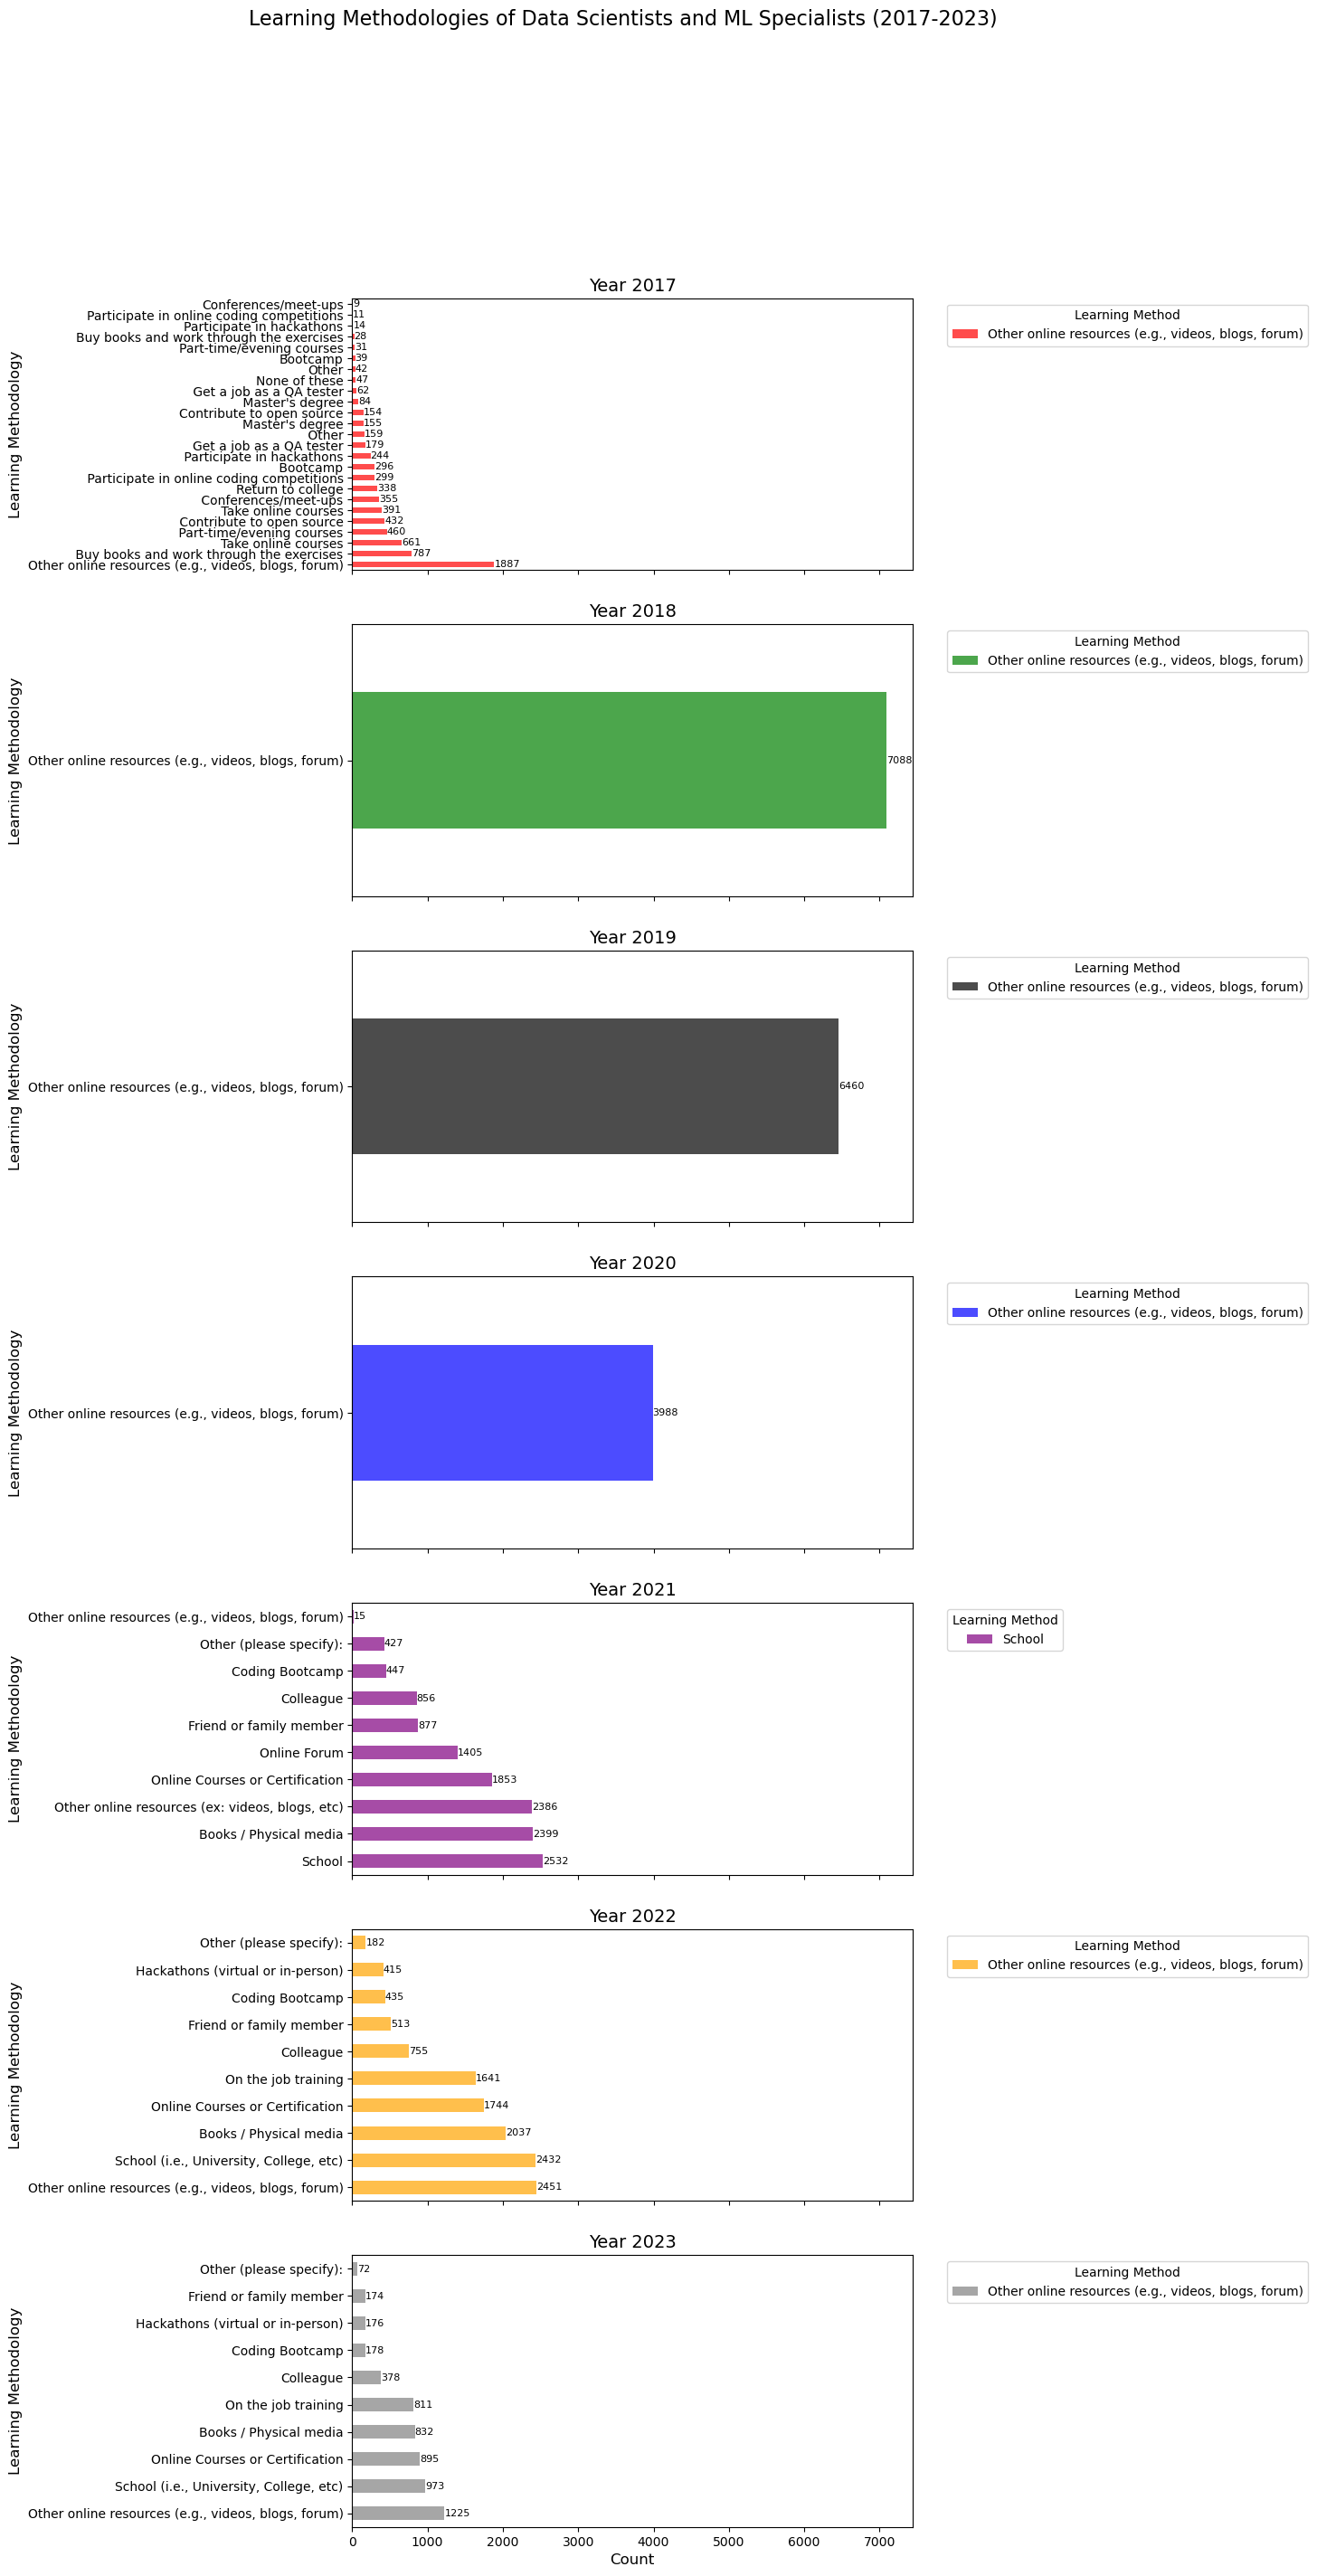

In [168]:
# Filter responses from Data Scientists or Machine Learning Specialists
dev_types_to_include = ['Data Scientist', 'Machine Learning Specialist']
filtered_data = df_data_scientists[df_data_scientists['DevType'].str.contains('|'.join(dev_types_to_include), case=False, na=False)].copy()

# Split values in the 'LearnCode' column
filtered_data['LearnCode'] = filtered_data['LearnCode'].str.split(';')

# Extract unique learning methodologies and their counts for each year
learning_methods_by_year = {}
for year in range(2017, 2024):
    year_condition = filtered_data['Year'] == year
    learning_methods = filtered_data[year_condition]['LearnCode'].explode().value_counts()
    learning_methods_by_year[year] = learning_methods

# Plot separate graphs for each year with distinct colors
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 32), sharex=True)  # Adjust figsize as needed
fig.suptitle('Learning Methodologies of Data Scientists and ML Specialists (2017-2023)', fontsize=16)

year_colors = {2017: 'red', 2018: 'green', 2019: 'black', 2020: 'blue', 2021: 'purple', 2022: 'orange', 2023: 'gray'}

for ax, (year, learning_methods) in zip(axes.flatten(), learning_methods_by_year.items()):
    if not learning_methods.empty:
        color = year_colors.get(year, 'gray')
        learning_methods.plot(kind='barh', ax=ax, alpha=0.7, color=color)
        ax.set_title(f'Year {year}', fontsize=14)
        ax.set_ylabel('Learning Methodology', fontsize=12)
        ax.set_xlabel('Count', fontsize=12)
        ax.legend(learning_methods.index, title='Learning Method', bbox_to_anchor=(1.05, 1), loc='upper left')
        
          # Add data labels
    for index, value in enumerate(learning_methods):
        ax.text(value, index, str(value), ha='left', va='center', fontsize=8, color='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=6.0)  # Increase the vertical space between subplots
plt.show()


<Figure size 1200x800 with 0 Axes>

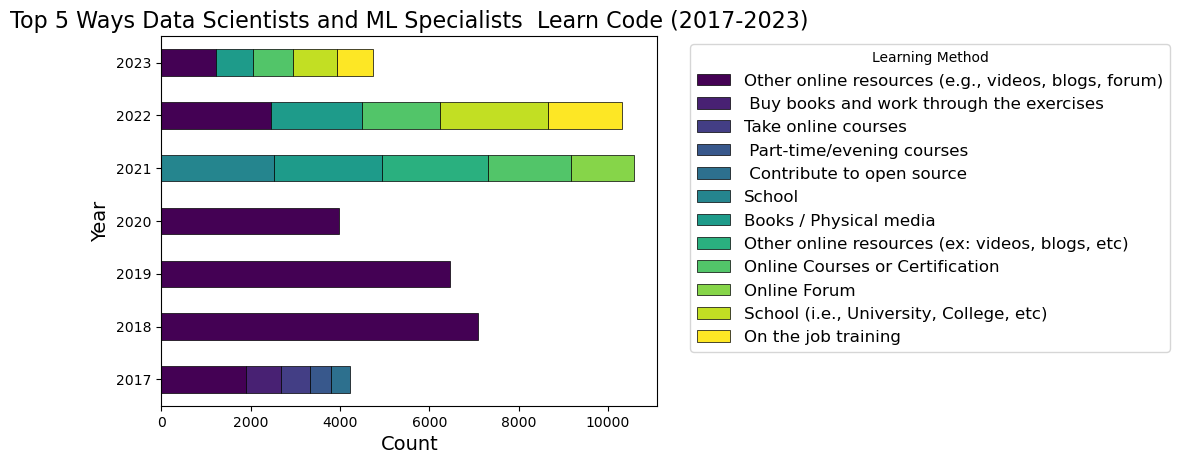

In [163]:
# Filter responses from Data Scientists or Machine Learning Specialists
dev_types_to_include = ['Data Scientist', 'Machine Learning Specialist']
filtered_data = df_data_scientists[df_data_scientists['DevType'].str.contains('|'.join(dev_types_to_include), case=False, na=False)].copy()

# Split values in the 'LearnCode' column
filtered_data['LearnCode'] = filtered_data['LearnCode'].str.split(';')

# Extract unique learning methodologies and their counts for each year
learning_methods_by_year = {}
for year in range(2017, 2024):
    year_condition = filtered_data['Year'] == year
    learning_methods = filtered_data[year_condition]['LearnCode'].explode().value_counts().nlargest(5)
    learning_methods_by_year[year] = learning_methods

# Combine data for all years into a single DataFrame
combined_data = pd.concat(learning_methods_by_year.values(), keys=learning_methods_by_year.keys(), axis=1).T

# Plot a single horizontal bar graph with distinct colors for each learning methodology
plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='black', linewidth=0.5)

plt.title('Top 5 Ways Data Scientists and ML Specialists  Learn Code (2017-2023)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.legend(title='Learning Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()

<Figure size 1200x800 with 0 Axes>

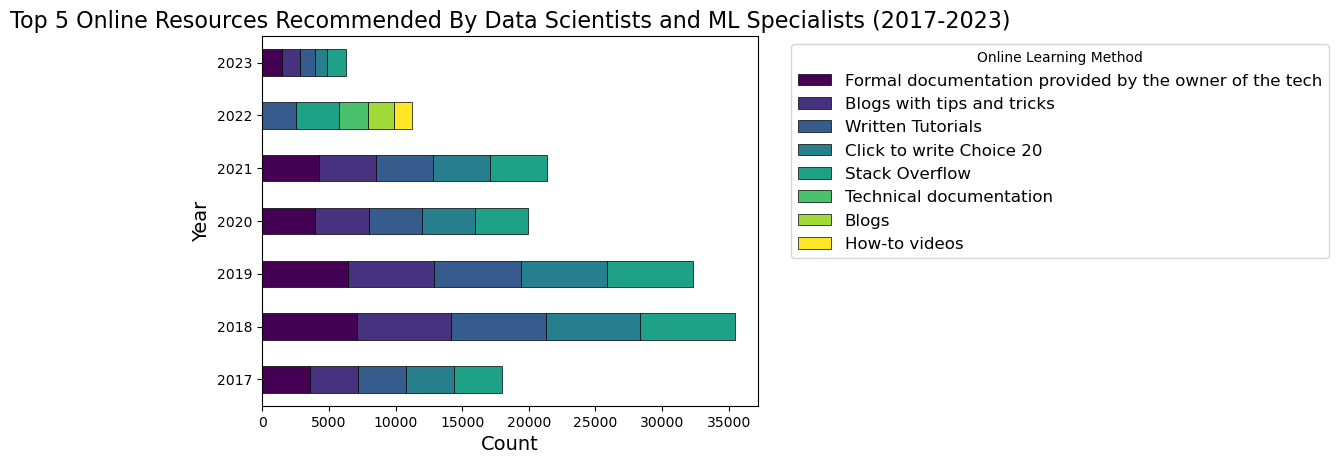

In [151]:
# Filter responses from Data Scientists or Machine Learning Specialists
dev_types_to_include = ['Data Scientist', 'Machine Learning Specialist']
filtered_data = df_data_scientists[df_data_scientists['DevType'].str.contains('|'.join(dev_types_to_include), case=False, na=False)].copy()

# Split values in the 'LearnCode' column
filtered_data['LearnCodeOnline'] = filtered_data['LearnCodeOnline'].str.split(';')

# Extract unique learning methodologies and their counts for each year
learning_methods_by_year = {}
for year in range(2017, 2024):
    year_condition = filtered_data['Year'] == year
    learning_methods = filtered_data[year_condition]['LearnCodeOnline'].explode().value_counts().nlargest(5)
    learning_methods_by_year[year] = learning_methods

# Combine data for all years into a single DataFrame
combined_data = pd.concat(learning_methods_by_year.values(), keys=learning_methods_by_year.keys(), axis=1).T

# Plot a single horizontal bar graph with distinct colors for each learning methodology
plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='black', linewidth=0.5)

plt.title('Top 5 Online Resources Recommended By Data Scientists and ML Specialists (2017-2023)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.legend(title='Online Learning Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()


##### Business Question 2 What are the most popular languages among data scientists over the years and are they different from developers?
Here we aim to highlight to a data scientist who is interested in learning coding on which language to prioritise based on their profession and any langugage trends over time to simplify their learning journey. this included identifying the number of scientists that responded to the survey each year as that may impact the analysis results; then went ahead to check the popular language among data scientists and how these preferences differed from other developers.

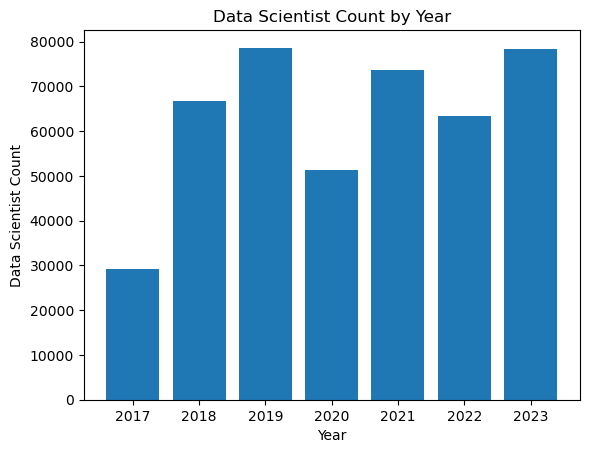

In [152]:
# Check if 'Python' or 'R' is in the list for data science association
data_scientist_df = df[df['LanguageWorkedWith'].str.contains('Python|R', case=False, na=False)]

# Group by Year and count occurrences
table = data_scientist_df.groupby('Year').size().reset_index(name='DataScientistCount')

# Create a bar chart
plt.bar(table['Year'], table['DataScientistCount'])
plt.xlabel('Year')
plt.ylabel('Data Scientist Count')
plt.title('Data Scientist Count by Year')
plt.show()


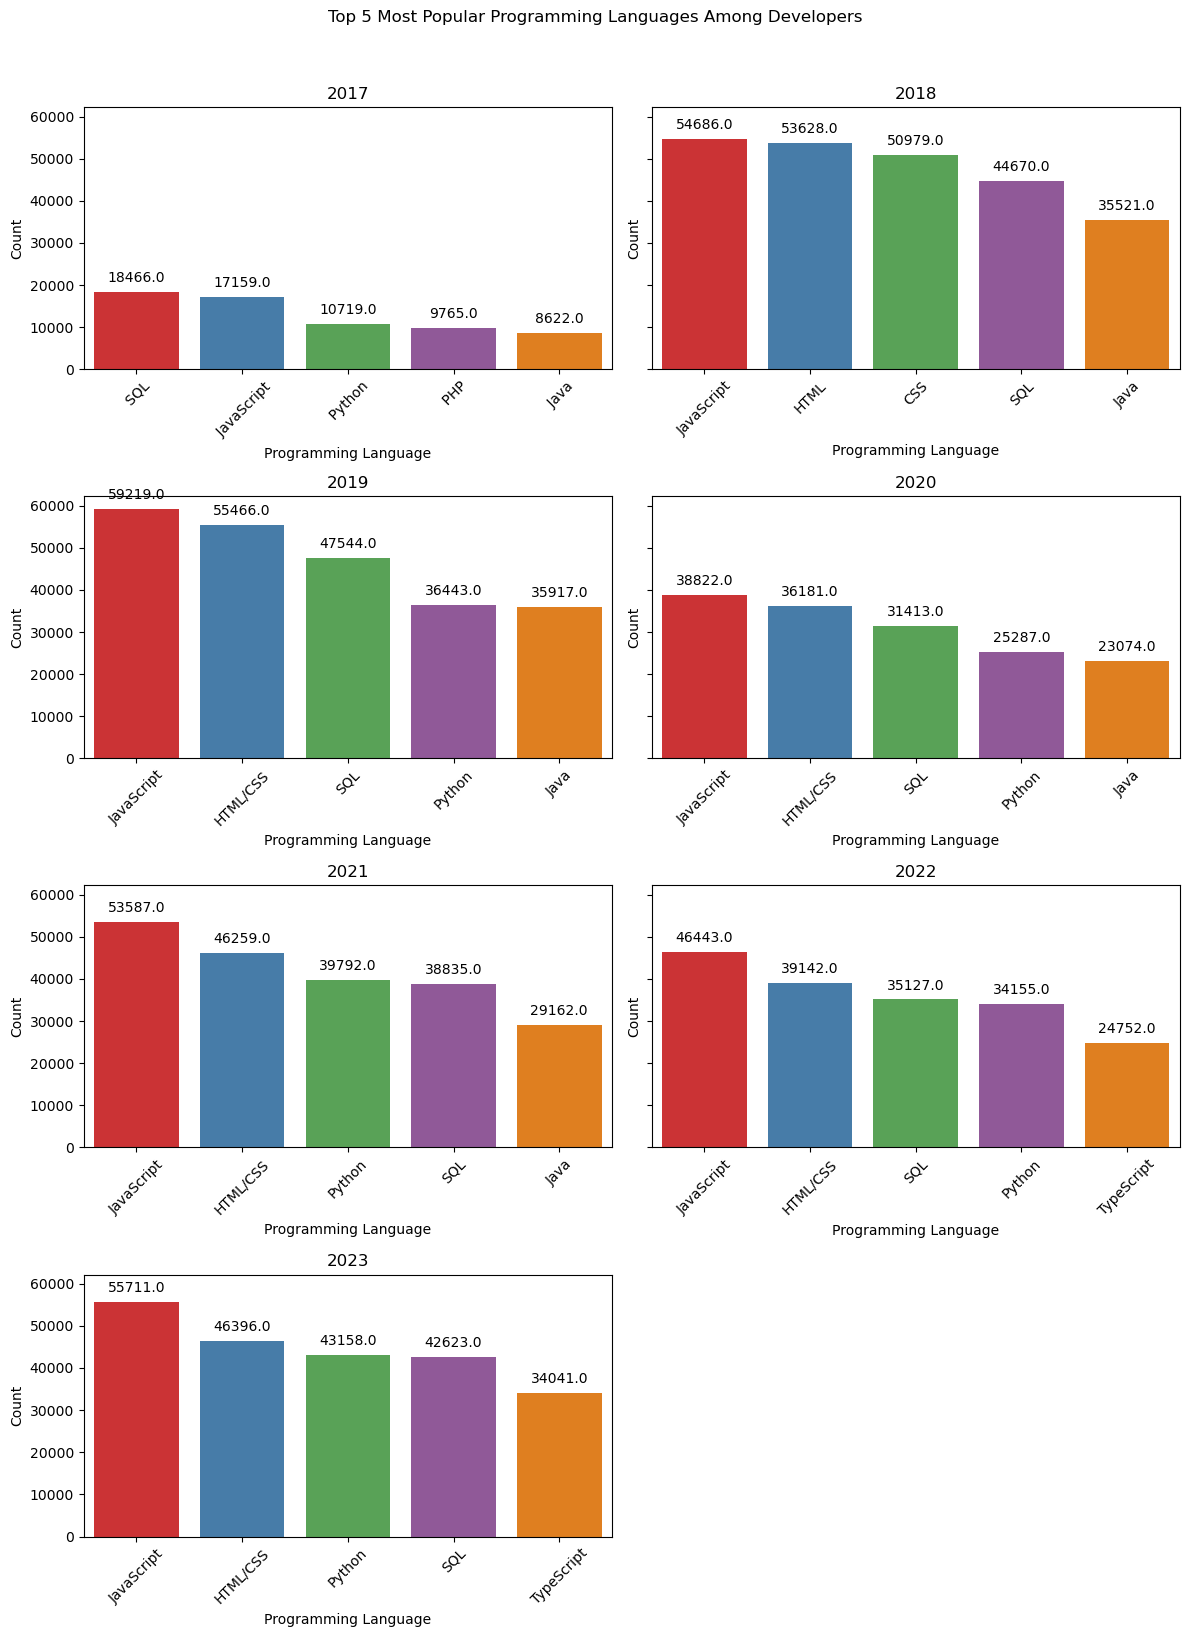

In [161]:
#plotting graphing for top 5 languages among developers...
def plot_top_languages_among_developers_over_the_years(dataframe):
    """
    Plot bar charts for the top 5 most popular programming languages among Developers
    in each year.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
    - None
    """
    # Get unique years in the DataFrame
    years = dataframe['Year'].unique()

    # Set the number of rows and columns for subplots
    num_rows = len(years) // 2 + len(years) % 2
    num_cols = 2

    # Calculate the height of each subplot based on the number of rows
    subplot_height = 4  # You can adjust this value based on your preference

    # Calculate the total height of the figure
    total_height = subplot_height * num_rows

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, total_height), sharey=True)

    # Set the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

    fig.suptitle('Top 5 Most Popular Programming Languages Among Developers', y=1.02)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot bar charts for the top 5 programming languages among data scientists each year
    for i, year in enumerate(years):
        # Subset the data for the current year
        subset_data = dataframe[dataframe['Year'] == year]
        # Split the 'LanguageWorkedWith' column and explode the resulting lists
        languages = subset_data['LanguageWorkedWith'].str.split(';').explode()
        # Find the top 5 most popular programming languages in the year
        top_languages_year = languages.value_counts().nlargest(5).index
        # Plot a bar chart for the top 5 programming languages among data scientists in the current year
        sns.countplot(x=languages, order=top_languages_year, ax=axes[i], palette='Set1')
        axes[i].set_title(f'{year}')
        axes[i].set_xlabel('Programming Language')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)  # Adjust rotation for better readability
        # Add data labels
        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Remove any empty subplots
    for i in range(len(years), num_rows * num_cols):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with the filtered DataFrame
plot_top_languages_among_developers_over_the_years(df)


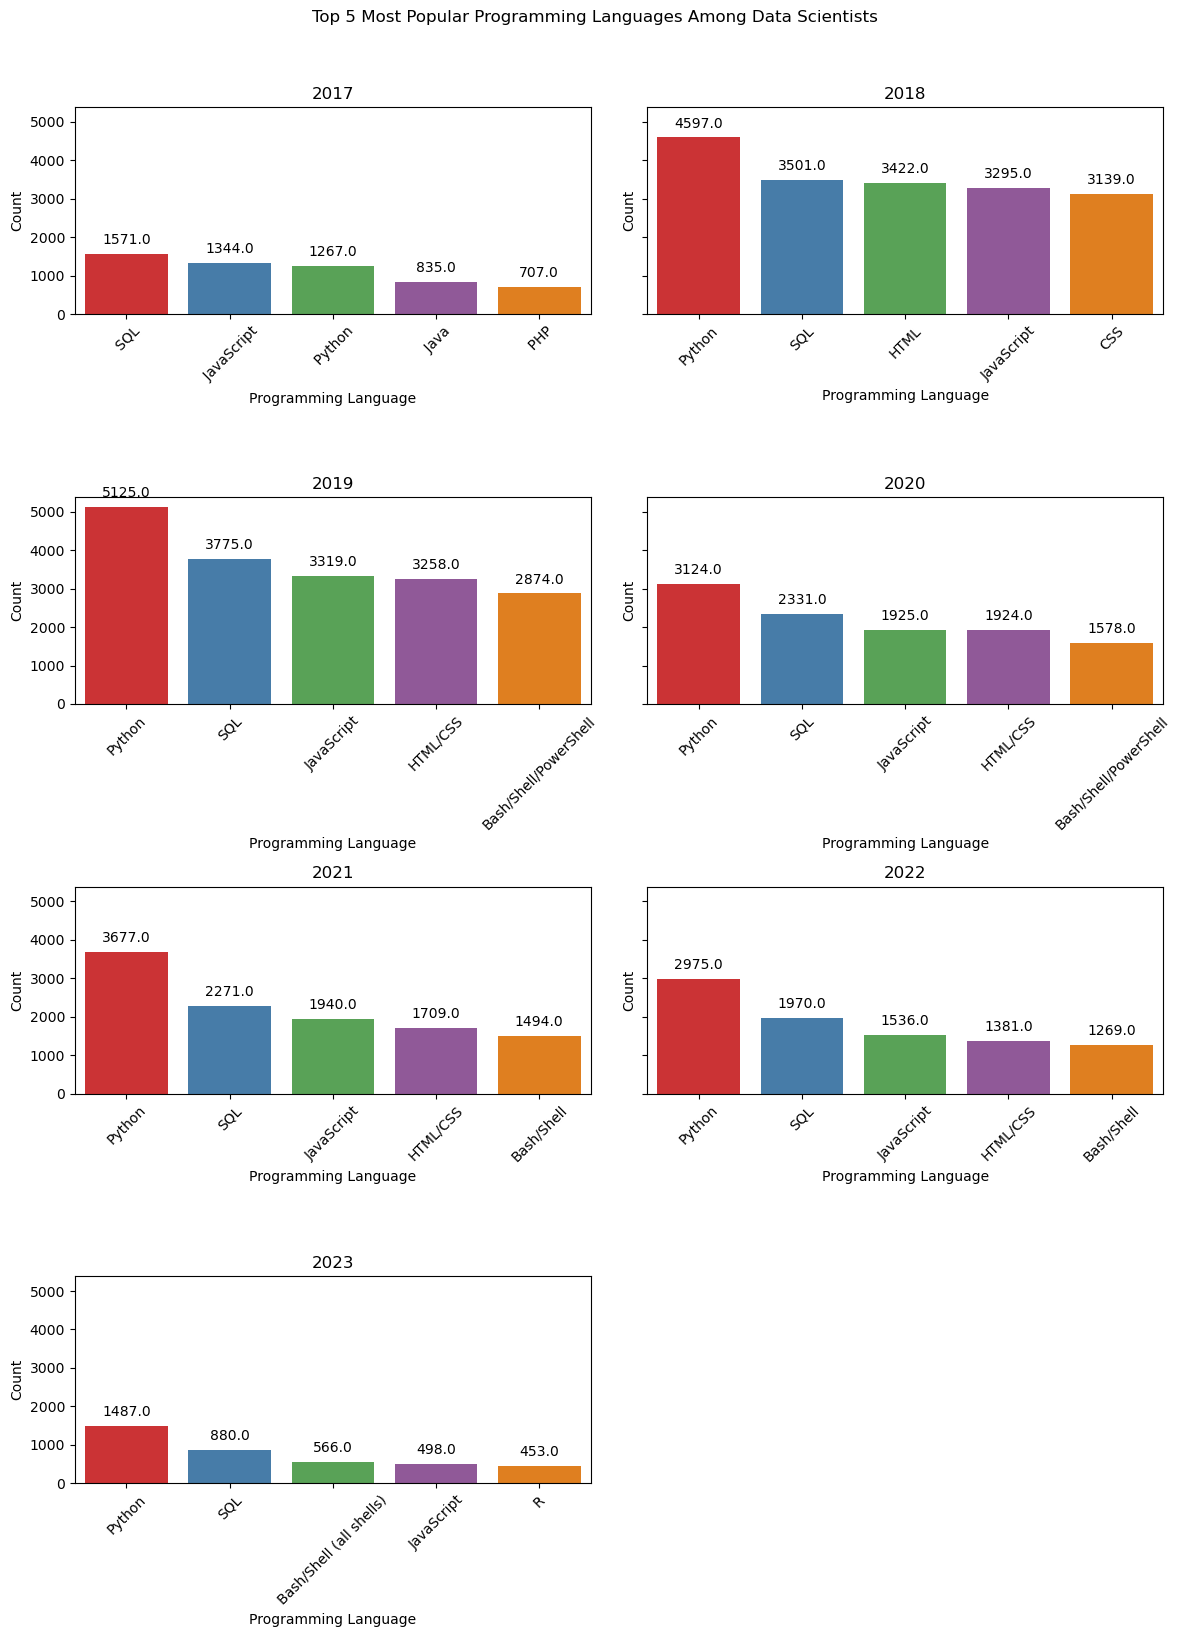

In [160]:
# Filter DataFrame for Data Scientists or Machine Learning Specialists
df_data_scientists = df[df['DevType'].apply(lambda x: 'Data scientist' in x or 'Machine learning specialist' in x if x else False)]

def plot_top_languages_among_data_scientists_over_the_years(dataframe):
    """
    Plot bar charts for the top 5 most popular programming languages among data scientists
    in each year.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.

    Returns:
    - None
    """
    # Get unique years in the DataFrame
    years = dataframe['Year'].unique()

    # Set the number of rows and columns for subplots
    num_rows = len(years) // 2 + len(years) % 2
    num_cols = 2

    # Calculate the height of each subplot based on the number of rows
    subplot_height = 4  # You can adjust this value based on your preference

    # Calculate the total height of the figure
    total_height = subplot_height * num_rows

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, total_height), sharey=True)

    # Set the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

    fig.suptitle('Top 5 Most Popular Programming Languages Among Data Scientists', y=1.02)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot bar charts for the top 5 programming languages among data scientists each year
    for i, year in enumerate(years):
        # Subset the data for the current year
        subset_data = dataframe[dataframe['Year'] == year]
        # Split the 'LanguageWorkedWith' column and explode the resulting lists
        languages = subset_data['LanguageWorkedWith'].str.split(';').explode()
        # Find the top 5 most popular programming languages in the year
        top_languages_year = languages.value_counts().nlargest(5).index
        # Plot a bar chart for the top 5 programming languages among data scientists in the current year
        sns.countplot(x=languages, order=top_languages_year, ax=axes[i], palette='Set1')
        axes[i].set_title(f'{year}')
        axes[i].set_xlabel('Programming Language')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)  # Adjust rotation for better readability
        
        # Add data labels
        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Remove any empty subplots
    for i in range(len(years), num_rows * num_cols):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with the filtered DataFrame
plot_top_languages_among_data_scientists_over_the_years(df_data_scientists)


##### Business Question 3 - What is the trend in remote work among data scientists and developers over the years?
The world dynamic has shifted post pandemic; hence most professionals and companies are adopting to either remote or hybrid working styles hence this question aims to understand the trend of remote working adoption among data scientists over the years.

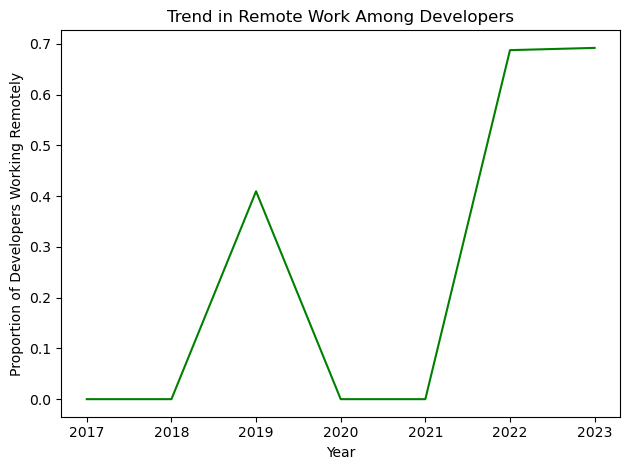

In [155]:
# Define the categories that are considered as working remotely
remote_categories = [
    'A few days each month',
    "All or almost all the time (I'm full-time remote)",
    'Less than half the time, but at least one day each week',
    'About half the time',
    'More than half, but not all, the time',
    'Fully remote',
    'Hybrid (some remote, some in-person)',
    'Remote'
]

# Create a new binary column that indicates whether a respondent works remotely
df['WorksRemotely'] = df['RemoteWork'].isin(remote_categories)

# Calculate the proportion of remote workers for each year
remote_work_trend = df.groupby('Year')['WorksRemotely'].mean()

# Plot the trend 
remote_work_trend.plot(kind='line', title='Trend in Remote Work Among Developers', color='green')
plt.ylabel('Proportion of Developers Working Remotely')

# Add tight layout to fit the plot to the page
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\Katur002\AppData\Local\Temp\ipykernel_3840\4268437864.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_scientists['WorksRemotely'] = df_data_scientists['RemoteWork'].isin(remote_categories)


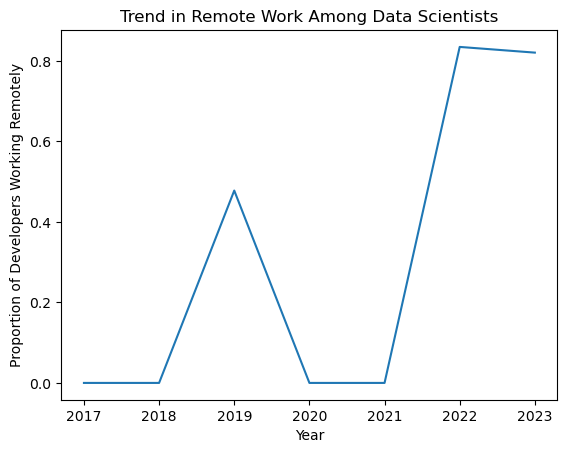

In [156]:
# Define the categories that are considered as working remotely
remote_categories = [
    'A few days each month',
    "All or almost all the time (I'm full-time remote)",
    'Less than half the time, but at least one day each week',
    'About half the time',
    'More than half, but not all, the time',
    'Fully remote',
    'Hybrid (some remote, some in-person)',
    'Remote'
]

# Create a new binary column that indicates whether a respondent works remotely
df_data_scientists['WorksRemotely'] = df_data_scientists['RemoteWork'].isin(remote_categories)

# Calculate the proportion of remote workers for each year
remote_work_trend = df_data_scientists.groupby('Year')['WorksRemotely'].mean()

# Plot the trend
remote_work_trend.plot(kind='line', title='Trend in Remote Work Among Data Scientists')
plt.ylabel('Proportion of Developers Working Remotely')
plt.show()


### 5. Evaluation

During this phase, we assessed the popularity of programming languages within the data scientist communities on an annual basis. We analyze the trends in the adoption of remote work among data scientists over successive years. Additionally, we pinpoint the prevailing methods through which data scientists acquire coding skills, identifying the most common approaches each year.

### 6. Deployment

In the concluding phase, we document both the analysis procedures and insights derived in a clear format, tailored for diverse audiences ranging from data scientists to general readers. We compiled documents that are suitable for sharing on platforms like Medium and GitHub, ensuring the widespread dissemination of the valuable insights obtained during the analysis.

 
### Conclusion

Conclusively, following the CRISP-DM framework we were able to gradually navigate this project from understanding the business questions to deriving actionable and decision informing insights. This analysis will benefit data scientists entering the field with the means through which they can learn to code, the common languages amongst data scientists and lastly the remote working trends over time.